**Clustering geolocation** data (latitude and longitude) is essential for applications like crash hotspot detection, delivery zoning, urban planning, and location-based marketing.
However, geospatial data presents unique challenges due to the Earth's curvature and non-Euclidean distances.

 **Summary**

For small, city-level data: KMeans is quick and effective

For noise-rich or irregular shapes: use DBSCAN or HDBSCAN

Always consider distance metric and scaling when clustering lat/lon

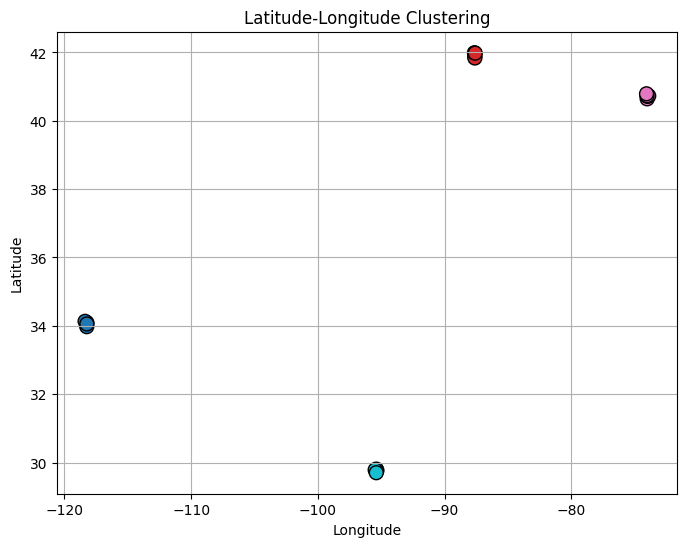

In [2]:
# Step 1: Read CSV file
# Make sure your CSV has 'Latitude' and 'Longitude' columns
df = pd.read_csv('Locations.csv')

# Step 2: Apply KMeans Clustering
n_clusters = 4  # Change this based on how many zones you want
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Latitude', 'Longitude']])

# Step 3: (Optional) Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='tab10', s=100, edgecolors='k')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude-Longitude Clustering')
plt.grid(True)
plt.show()

# Step 4: Save result if needed
df.to_csv('clustered_output.csv', index=False)

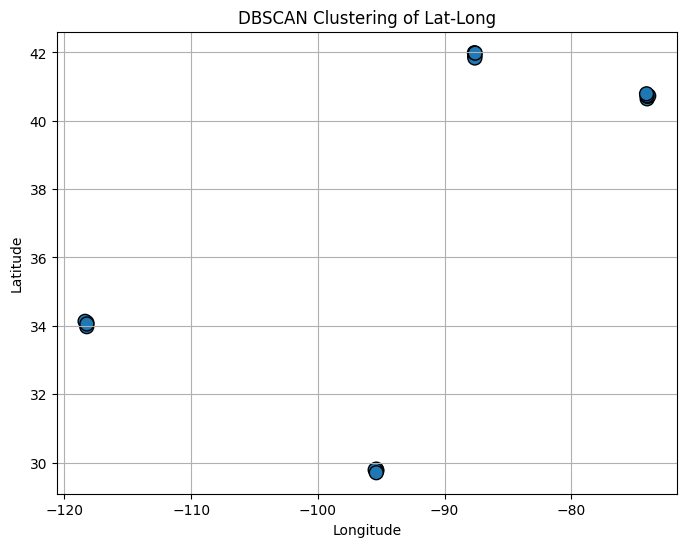

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Step 1: Load the CSV
df = pd.read_csv('Locations.csv')  # Must contain 'Latitude', 'Longitude'

# Step 2: Prepare coordinates (convert to radians for Haversine if needed)
coords = df[['Latitude', 'Longitude']].to_numpy()
coords_rad = np.radians(coords)  # Required for haversine

# Step 3: DBSCAN with Haversine metric
kms_per_radian = 6371.0088
epsilon = 1.0 / kms_per_radian  # 1 km radius

db = DBSCAN(eps=epsilon, min_samples=3, metric='haversine').fit(coords_rad)
df['Cluster'] = db.labels_  # -1 means noise

# Step 4: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='tab10', s=100, edgecolors='k')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering of Lat-Long')
plt.grid(True)
plt.show()

# Step 5: Save result
df.to_csv('dbscan_clusters.csv', index=False)
